# Assignment 4: Support Vector Machine (SVM) and Model Ensembling {-}

This assignment aims at familiarizing you with training and testing Suppor Vector Machine (SVM) classification model, along with model ensembling methods. The dataset you will be working on is 'data-breast-cancer.csv'. It is composed of attributes to build a prediction model. You will have to do:

1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the data-breast-cancer.csv dataset and perform basic data cleaning, analysis and visualization to have a deep understanding about the data. Identify and remove outliers if applicable.  
    1.2 *(1 point)* Train and evaluate an SVM model. Use GridSearchCV to find the best parameters: kernel, C, and gamma values, for the SVM model. Details of the SVM parameters can be found at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.  
    1.3 *(1 point)* Train and evaluate four other classifiers: Logistic Regression, Naive Bayes, Decision Tree and Random Forest. Compare their accuracy, precision, recall, and F1-score with the SVM's performance.  
    1.4 *(2 points)* Apply three ensemble learning techniques: Bagging, Boosting, and Stacking, to solve the problem. Compare their performance against each other as well as against individual models. Summarize your observations and draw conclusions based on the results.

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* How well did the SVM model perform compared to the other classifiers? Did it outperform them, or did another model work better?  
    2.2 *(1 point)* How did tuning the C and gamma parameters affect the model’s performance? Did you observe any signs of overfitting or underfitting?  
    2.3 *(1 point)* How could this breast cancer classification model be used in real-world healthcare applications? What challenges might arise in deployment?  
    2.4 *(1 point)* Medical diagnosis models come with ethical responsibilities. What are potential risks of using an automated model for breast cancer detection?  
    2.5 *(1 point)* What was the most insightful part of this assignment? If you could improve your classification result, what would you do differently?  

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment4-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment4 (e.g., ML4DS-2012345-Assigment4) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have data exploration and modeling steps other than the basic requirements. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Load the libraries
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("data-breast-cancer.csv")

In [3]:
# Show some data samples
df.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


This is a dataset used to detect whether a patient has breast cancer depending on the following features: 

- diagnosis: (label) the diagnosis of breast (label) tissues (M = malignant, B = benign).
- radius: distances from center to points on the perimeter.
- texture: standard deviation of gray-scale values.
- perimeter: perimeter of the tumor.
- area: area of the tumor.
- smoothness: local variation in radius lengths.
- compactness: is equal to (perimeter^2 / area - 1.0).
- concavity: severity of concave portions of the contour.
- concave points: number of concave portions of the contour.
- symmetry: symmetry of the tumor shape.
- fractal dimension: "coastline approximation" - 1.



## 1. Coding tasks

In [4]:
# Your code goes here. Please make sure to explain the reasons behind your data processing and modeling choices.
# 1.1
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (569, 12)

Data types:
 Unnamed: 0                  int64
diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

Missing values:
 Unnamed: 0                0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64


In [5]:
print("\nStatistical summary (numeric features):\n", df.describe())
print("\nUnique values per column:\n", df.nunique())


Statistical summary (numeric features):
        Unnamed: 0  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean   284.000000    14.127292     19.289649       91.969033   654.889104   
std    164.400426     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%    142.000000    11.700000     16.170000       75.170000   420.300000   
50%    284.000000    13.370000     18.840000       86.240000   551.100000   
75%    426.000000    15.780000     21.800000      104.100000   782.700000   
max    568.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.01406

In [6]:
# Remove duplicates
df = df.drop_duplicates()

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Fill missing numeric values with median value
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with mode (most common)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [7]:
print("\nAfter cleaning:")
print(df.info())
print("\nRemaining missing values:\n", df.isnull().sum())


After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB
None

Remaining missing values:
 Unnamed: 0                0
diagnosis  

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Drop the first column to better analyse the dataset
df = df.drop(df.columns[0], axis=1)
df.dropna(inplace=True)

print(df.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.0

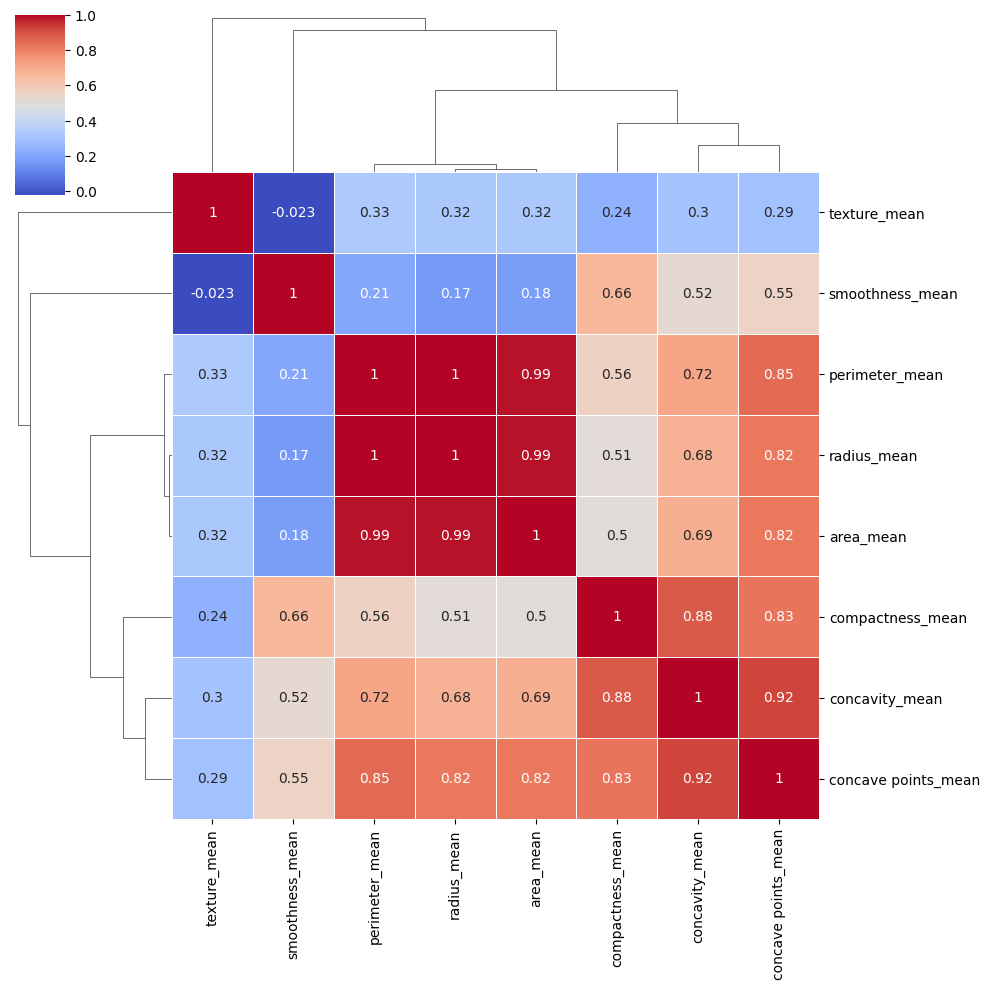

In [10]:
# Choose the numeric columns
numeric_df = df.select_dtypes(include="number")

# Count the correlation matrix
corr = numeric_df.corr()

features = [
    "radius_mean", "texture_mean", "perimeter_mean", 
    "area_mean", "smoothness_mean", "compactness_mean", 
    "concavity_mean", "concave points_mean"
]

# Correlation Cluster Heatmap (Numeric)

sns.clustermap(df[features].corr(), cmap="coolwarm", annot=True, linewidths=0.5)
plt.show()

The clustered correlation heatmap reveals several key relationships among the features, highlighting significant interdependance within the dataset. The first cluster consists of radius_mean, perimeter_mean, and area_mean, which exhibit almost perfect correlations because they are mathematically related and all represent global tumor size. This indicates that these variables are redundant and capture the same geometric dimension of the mass. 

The second cluster groups compactness_mean, concavity_mean, and concave points_mean, all of which describe boundary irregularities such as angularity and inward curvatures, properties strongly associated with malignant tumors. Their high correlations (0.83–0.92) show that these features jointly encode structural distortion and are collectively powerful predictors of malignancy. 

In contrast, texture_mean and smoothness_mean form a smaller and more independent cluster, as they correlate only weakly with the other feature families. These variables represent detailed information about internal pixel variability and local boundary fluctuations, contributing complementary insights that are not captured by size or shape irregularity measures. 

Together, the clustering structure highlights how different aspects of tumor morphology relate to one another and helps identify both redundant and uniquely informative features for downstream modeling.

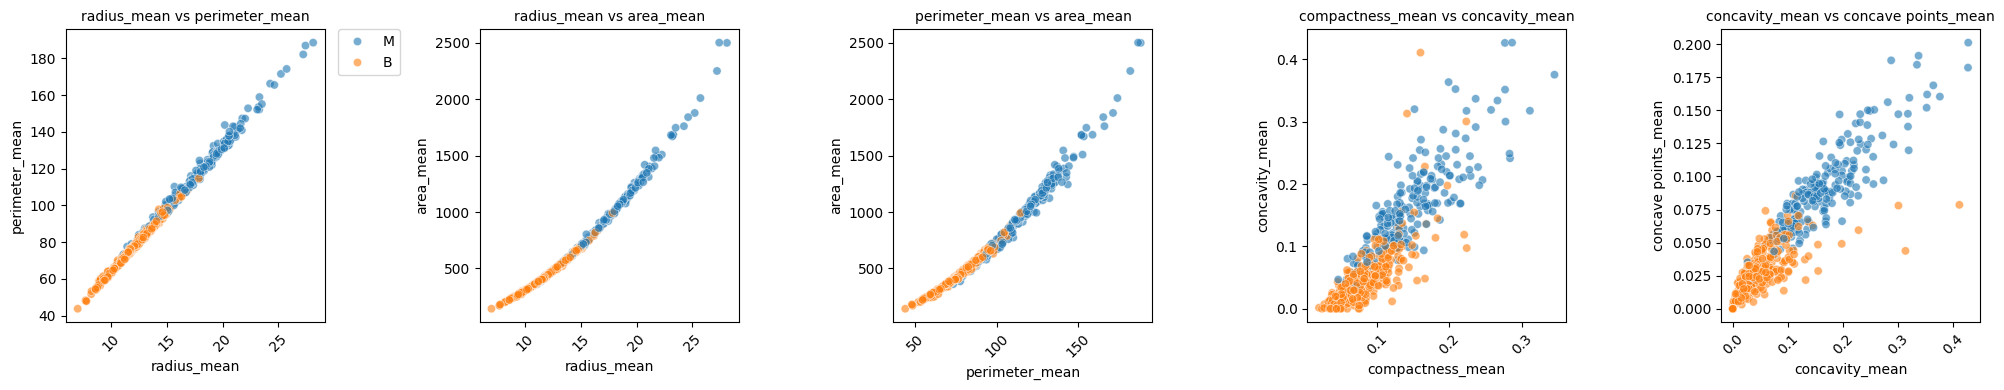

In [11]:
# High Correlation Pairs' Visualization
pairs = [
    ("radius_mean", "perimeter_mean"),
    ("radius_mean", "area_mean"),
    ("perimeter_mean", "area_mean"),
    ("compactness_mean", "concavity_mean"),
    ("concavity_mean", "concave points_mean"),
]

N_PAIRS = len(pairs)
fig, axes = plt.subplots(1, N_PAIRS, figsize=(4 * N_PAIRS, 4)) 

for i, (x, y) in enumerate(pairs):
    
    ax = axes[i] 
    
    sns.scatterplot(x=df[x], y=df[y], hue=df['diagnosis'], alpha=0.6, ax=ax)
    
    ax.set_title(f"{x} vs {y}", fontsize=10)
    ax.tick_params(axis='x', rotation=45) 
    
    if i > 0:
        ax.legend_.remove()
    else:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()



The visualization of the five most highly correlated feature pairs confirms two critical aspects of the dataset structure which is significant internal redundancy and strong predictive power. The three pairs representing size metrics (radius_mean vs. perimeter_mean, radius_mean vs. area_mean, and perimeter_mean vs. area_mean) demonstrate an almost perfect linear relationship, confirming mathematical interdependence and indicating that only one variable is required to model the size characteristic. 

Similarly, the shape and irregularity pairs (compactness_mean vs. concavity_mean and concavity_mean vs. concave points_mean) also show a robust positive correlation, suggesting that these features collectively measure a single underlying concept: morphological complexity. 

However, all five visualizations exhibit a clear and distinct separation between the benign (blue) and malignant (red/orange) diagnoses. Malignant cases consistently occupy the upper-right region of every plot (higher values for size and irregularity), while benign cases cluster in the lower-left region (lower values). This distinct visual separation confirms that both the size and shape characteristics of the mass are exceptionally strong and effective features for predicting the final diagnostic outcome.

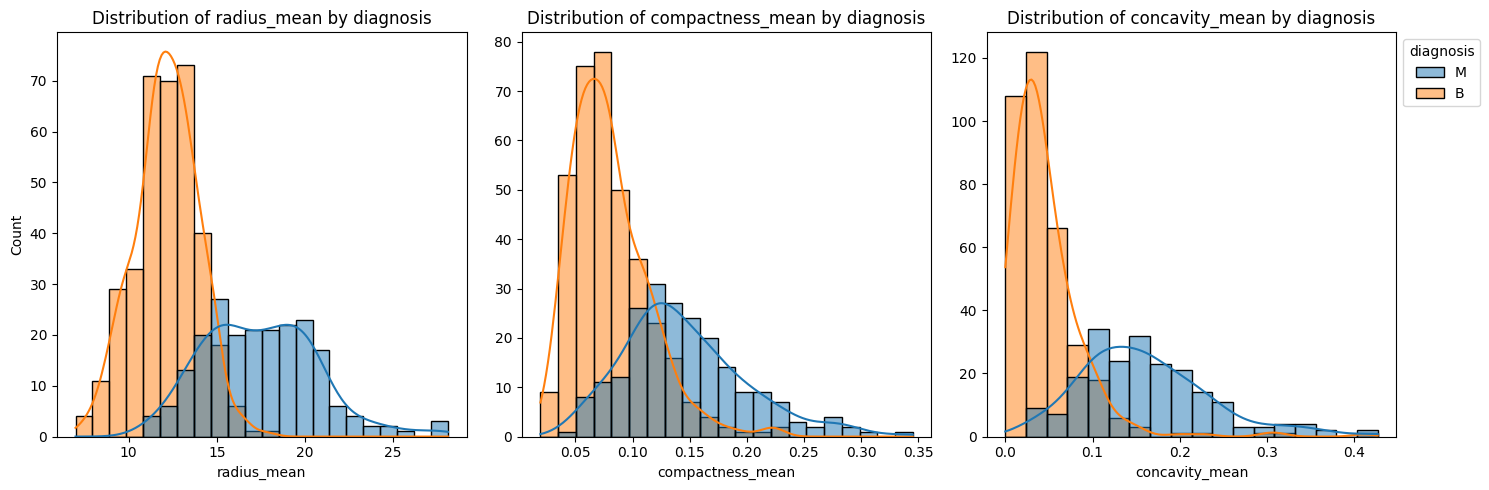

In [12]:
dist_features = ["radius_mean", "compactness_mean", "concavity_mean"]
target = "diagnosis"

N_FEATURES = len(dist_features)
fig, axes = plt.subplots(1, N_FEATURES, figsize=(5 * N_FEATURES, 5)) 

for i, col in enumerate(dist_features):
    
    ax = axes[i] 
    
    sns.histplot(data=df, x=col, hue=target, kde=True, alpha=0.5, ax=ax)
    
    ax.set_title(f"Distribution of {col} by {target}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Count" if i == 0 else "") 
    
    legend = ax.get_legend()
    
    if i < N_FEATURES - 1:
        if legend is not None:
            legend.remove()
    else:
        if legend is not None:
            legend.set_title(target)
            legend.set_bbox_to_anchor((1.0, 1.0))
            legend.set_loc('upper left')
        
plt.tight_layout()
plt.show()


The box plot visualization effectively summarizes the distribution characteristics of six key features relative to the diagnostic outcome (Benign 'B' vs. Malignant 'M'). The analysis reveals that the size-related metrics (radius_mean, perimeter_mean, and area_mean) and morphological irregularity (concave points_mean) are the most powerful predictors, showing minimal overlap between the two diagnostic groups. For these four features, the Malignant (M) distribution consistently exhibits significantly higher median values and interquartile ranges (IQR) compared to the Benign (B) distribution, confirming that larger tumors with greater structural complexity are highly associated with malignancy.

Conversely, surface characteristics (smoothness_mean and texture_mean) demonstrate a considerably higher degree of overlap in their central distributions (IQRs). While the Malignant group still trends towards higher values, the closeness of the medians and the mixing of their quartiles suggest that these features are less robust as standalone differentiators. This analysis clearly highlights that a combination of increased size and high concave points are the most critical factors in distinguishing malignant from benign masses in this dataset.

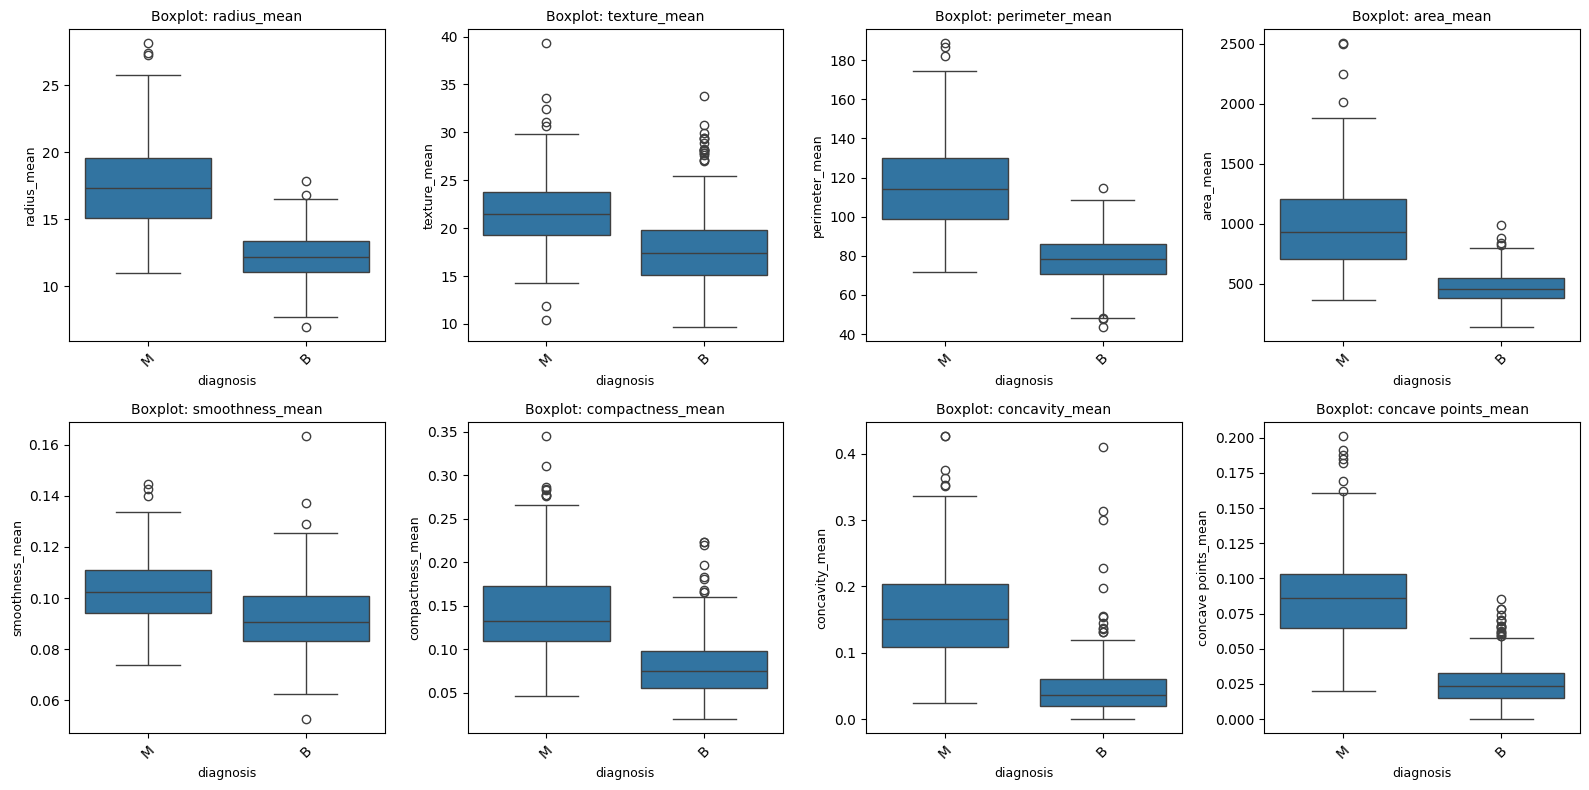

In [13]:
N_ROWS = 2
N_COLS = 4

fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(16, 8)) 
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i] 
    
    sns.boxplot(x=df[target], y=df[col], ax=ax)
    
    ax.set_title(f"Boxplot: {col}", fontsize=10)
    ax.tick_params(axis='x', rotation=45) 
    ax.set_ylabel(col, fontsize=9)
    ax.set_xlabel(target, fontsize=9)

plt.tight_layout()
plt.show()



The comprehensive set of eight box plots effectively summarizes the relationship between the key morphological features and the diagnostic outcome (Benign 'B' vs. Malignant 'M'). The analysis clearly separates the features into highly predictive and weakly predictive groups. 

The metrics related to size (radius_mean, perimeter_mean, and area_mean) and structural irregularity (concave points_mean and concavity_mean) emerge as the strongest discriminators. For these features, the Malignant (M) group consistently exhibits significantly higher median values and interquartile ranges (IQRs) with minimal to no overlap with the Benign (B) group, confirming that larger, more structurally complex tumors are highly associated with malignancy. 

Conversely, surface and uniformity metrics (smoothness_mean and texture_mean) are considerably weaker predictors. Both features display substantial overlap in their distributions, with medians for the two groups lying close together, indicating that the texture and overall smoothness of the mass are less reliable as standalone factors for accurate classification. 

Overall, the visualization confirms that a model should prioritize the size and structural metrics while treating texture and smoothness as supplementary information.

In [41]:
# Your code goes here. Please make sure to explain the reasons behind your data processing and modeling choices.
# 1.2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train-test split
x = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y  #Imbalance data
)

# Standardize 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GridSearchCV + SVM

param_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.001]
}
svm = SVC()
grid = GridSearchCV(
    svm,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train_scaled, y_train)
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# Evaluate best model
best_svm = grid.best_estimator_

y_pred = best_svm.predict(X_test_scaled)

print("\nTest Accuracy")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.9472527472527472

Test Accuracy
0.9736842105263158

Confusion Matrix
[[71  1]
 [ 2 40]]

Classification Report
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



1. Data Processing

Train-Test Split: The dataset is divided into training (80%) and testing (20%) sets to evaluate the model on unseen data, reducing the risk of overfitting. Stratifying by the target variable ensures that the class distribution in both sets reflects the original dataset, which is important for imbalanced data. Setting a fixed random_state guarantees reproducibility.

Standardization: Features are standardized using StandardScaler to have zero mean and unit variance. This step is crucial for SVMs, as they are sensitive to feature scales. Standardization ensures faster convergence and prevents features with larger scales from dominating the model. Moreover, the scaler is fitted on the training set only and then applied to the test set to avoid data leakage.

2. Hyperparameter Tuning with GridSearchCV: SVM performance depends on key hyperparameters:

- C: controls regularization, balancing training accuracy and model generalization.

- gamma: affects the shape of the decision boundary for non-linear kernels.

- kernel: selects the type of decision boundary (linear, polynomial, or RBF).

GridSearchCV systematically evaluates all combinations using 5-fold cross-validation, ensuring robust selection of the best parameters and preventing overfitting.

The overall pipeline, which includes train-test split → scaling → hyperparameter tuning → test evaluation, represents one of the effective practices for machine learning classification. Standardization and hyperparameter tuning are critical for SVM performance, while multiple evaluation metrics provide a thorough assessment of model effectiveness, especially in the context of medical or imbalanced datasets.

In [42]:
# Your code goes here. Please make sure to explain the reasons behind your data processing and modeling choices.
# 1.3
# Define models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='saga'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM (RBF)": SVC(probability=True)  # so sánh
}

# Train & evaluate
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

df_results = pd.DataFrame(results)
print(df_results.sort_values(by="Accuracy", ascending=False))

                 Model  Accuracy  Precision    Recall  F1 Score
4            SVM (RBF)  0.956140   0.956869  0.956140  0.955776
0  Logistic Regression  0.929825   0.931066  0.929825  0.930146
3        Random Forest  0.929825   0.929694  0.929825  0.929449
2        Decision Tree  0.903509   0.903266  0.903509  0.902707
1          Naive Bayes  0.894737   0.894737  0.894737  0.893528


After training four classifiers: Logistic Regression, Naive Bayes, Decision Tree, and Random Forest to see which performs best on our dataset, I was able to draw many interesting insights that align well with the theories I have learned. Logistic Regression provides a simple linear baseline, Naive Bayes offers a probabilistic perspective, Decision Tree captures feature interactions, and Random Forest reduces overfitting by combining many trees. SVM with RBF kernel was also included as a non-linear reference. We evaluated all models using accuracy, precision, recall, and F1-score to get a clear picture of their strengths and weaknesses.

From the result, we can observed:

- SVM (RBF) achieved the highest accuracy (0.956) and consistently strong precision, recall, and F1-score, indicating it handles the dataset well and captures non-linear patterns effectively.

- Logistic Regression and Random Forest performed similarly, with slightly lower scores (~0.93). Logistic Regression shows that a linear approach works reasonably well, while Random Forest benefits from ensemble learning to improve stability.

- Decision Tree achieved moderate performance (~0.90), which is expected since single trees are prone to overfitting and can be sensitive to small data variations.

- Naive Bayes had the lowest scores (~0.895), likely due to its strong assumption of feature independence, which does not perfectly hold in this dataset. (1.1 analysis of correlation cluster heatmap)

We come to the conclusion that SVM with an RBF kernel is the best-performing model for this dataset, while ensemble methods like Random Forest also provide competitive performance. Linear and probabilistic models work reasonably well but are slightly less effective. These results highlight the importance of selecting models that can capture non-linear relationships and complex interactions in the data.

In [38]:
# Your code goes here. Please make sure to explain the reasons behind your data processing and modeling choices.
# 1.4
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

# Ensemble models
ensemble_models = {
    "Bagging (Decision Tree)": BaggingClassifier(DecisionTreeClassifier(), n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "Stacking": StackingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000, solver='saga')),
            ('dt', DecisionTreeClassifier()),
            ('svm', SVC(probability=True))
        ],
        final_estimator=RandomForestClassifier()
    )
}

# Train & evaluate ensemble
ensemble_results = []

for name, model in ensemble_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    ensemble_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

df_ensemble = pd.DataFrame(ensemble_results)
print(df_ensemble.sort_values(by="Accuracy", ascending=False))


                     Model  Accuracy  Precision    Recall  F1 Score
3                 Stacking  0.956140   0.956869  0.956140  0.955776
2        Gradient Boosting  0.947368   0.947440  0.947368  0.947087
0  Bagging (Decision Tree)  0.938596   0.938435  0.938596  0.938438
1                 AdaBoost  0.929825   0.931066  0.929825  0.930146


The ensemble learning techniques: Stacking, Gradient Boosting, Bagging, and AdaBoost were applied to improve model performance and compared against individual classifiers. Among these, Stacking achieved the highest accuracy (0.956) along with consistently strong precision, recall, and F1-score, matching the performance of the best individual model (SVM). This indicates that combining multiple base classifiers (Logistic Regression, Decision Tree, and SVM) with a meta-learner effectivelysharpened the complementary strengths of each model, allowing the ensemble to capture patterns that individual models may miss, and producing more robust and generalized predictions. Gradient Boosting performed slightly lower (0.947), demonstrating that sequentially training weak learners to focus on errors from previous iterations can effectively capture complex non-linear relationships in the data, though it may be more sensitive to noise. Bagging with Decision Trees improved performance over a single Decision Tree (0.939) by averaging predictions from multiple independently trained trees, which reduces variance and mitigates overfitting inherent in individual trees. AdaBoost provided moderate gains over simpler models like Logistic Regression (0.930) by emphasizing misclassified samples during training, though its overall performance was slightly lower than the other ensemble methods, likely due to the limited complexity of the base learners in capturing all data patterns. 

Overall, all ensemble methods outperformed weaker individual models such as Decision Tree and Naive Bayes, underscoring the value of ensemble approaches, particularly Stacking, in improving prediction accuracy, balancing bias and variance, and leveraging diverse model strengths to produce more reliable results.

## 2. Open discussion questions

In [ ]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.1

The SVM (RBF) model clearly outperformed all other individual classifiers on this dataset, achieving the highest accuracy (0.956) along with consistently strong precision, recall, and F1-score. This superior performance can be attributed to the RBF kernel’s ability to capture complex, non-linear relationships between features, allowing the model to create flexible decision boundaries that separate classes more effectively than linear models like Logistic Regression. Logistic Regression and Random Forest achieved slightly lower accuracy (~0.930), indicating that while a linear approach and an ensemble of trees can perform reasonably well, they may not fully capture the non-linear patterns present in the data. Decision Tree and Naive Bayes performed worse (~0.904 and ~0.895), likely due to the high variance of a single tree and the strong independence assumptions of Naive Bayes, which do not hold perfectly in this dataset. 

To sum up, SVM not only achieved the highest overall accuracy but also maintained balanced precision and recall, demonstrating its robustness in handling both classes and making it the most effective single model for this problem. This highlights the advantage of using kernel-based methods when the data contains complex interactions that simpler models or single trees cannot fully exploit.

In [23]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.2

Tuning the C and gamma parameters had a clear influence on the performance and generalization ability of the SVM model. The parameter C controls how strictly the model tries to classify every training sample, where a large C forces the decision boundary to fit closely to the data, often resulting in a narrow margin and potential overfitting. Conversely, a smaller C allows the boundary to remain smoother and maintain a wider margin, reducing sensitivity to noise but risking underfitting. 

The gamma parameter further adjusts how flexible the boundary is: a high gamma creates highly curved decision surfaces that may cling too closely to individual points, while a low gamma produces a simpler, smoother separation. A key reason this balance matters is that SVM relies on maximizing the margin, which is the distance between the decision boundary and the closest samples. A sufficiently wide margin ensures that if new data points appear near existing ones, the model can still classify them correctly. If the boundary is drawn too tightly around the training data, even slight variations in new samples can cause misclassification. Through GridSearchCV, the model identified an optimal combination of C and gamma that achieved high and consistent performance across accuracy, precision, recall, and f1-score, indicating no noticeable signs of overfitting or underfitting. 

This suggests that the tuned SVM not only fits the training data well but also maintains a stable boundary that works effectively to other samples not included in the dataset yet.

In [24]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.3

A breast cancer classification model like this could support real-world healthcare by assisting radiologists and clinicians in early detection and patients seperations. For example, the model could be integrated into diagnostic workflows to automatically flag suspicious cases from mammogram-derived features, helping doctors prioritize high-risk patients and reducing diagnostic workload. It could also be used as a second-opinion tool, offering consistent and quantitative assessments that complement human judgment, especially in settings with limited medical expertise. 

However, deploying such a model comes with several challenges. First, clinical data often varies across hospitals, imaging devices, and patient demographics, which may cause the model trained on one dataset to perform poorly elsewhere. Furthermore, some medical conditions involve hidden or non-obvious symptoms that do not appear early on and may only emerge suddenly or within a short time frame. These diseases are often detected only when patients undergo routine health check-ups. Because the symptoms are subtle and appear “normal,” using machine learning models to identify them becomes challenging. In many cases, patients themselves may perceive these signs as ordinary and therefore do not report them, leading to gaps or inaccuracies in the dataset. Another major risk when using machine learning models in healthcare is the issue of reliability. In medical contexts, even a small mistake can lead to severe consequences, including dead. Even if a model achieves near-perfect or even 100% accuracy on a dataset, the involvement of doctors remains essential. Doctors provide interpretation, clinical reasoning, and final judgment, whereas the model simply outputs a prediction without the ability to explain its decision. This lack of interpretability is critical because patients need clear explanations to understand the underlying causes of their conditions and to receive appropriate treatment plans.

For serious and sudden diseases such as cancer, nerve paralysis, stroke, or kidney failure, the way the diagnosis is communicated is extremely important, as it directly affects the patient’s psychological and emotional well-being. A model that delivers a cold, context-less result without empathy, nuance, or human sensitivity can become a psychological “shock” for the patient, rather than constructive medical guidance. For this reason, ML predictions must always be paired with human medical expertise to ensure both accuracy and compassionate communication. 

Finally, integrating machine learning tools with existing hospital information systems can be technically complex, and clinicians may be hesitant to trust automated decisions without clear explanations. These challenges mean that while the model has strong potential to improve early detection and clinical efficiency, it must be carefully validated, monitored, and supported by human oversight in real-world deployment.

In [25]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.4

Automated breast cancer detection models introduce several ethical risks that must be carefully managed in real-world healthcare. The most serious concern is patient harm from false negatives, which could delay treatment, and false positives, which may lead to unnecessary anxiety, biopsies, or overtreatment. These systems can also reflect biases in the training data, resulting in unequal performance across different demographic groups and potentially widening health disparities. Over-reliance on algorithmic output may erode clinical judgment, especially when models lack transparency or cannot explain their decisions. 

Another critical risk is false negatives, where the model predicts a patient is healthy when they actually have cancer, potentially delaying treatment and leading to life-threatening outcomes. Similarly, false positives, where a patient is incorrectly flagged as having cancer, can cause unnecessary anxiety, additional tests, and even invasive procedures. If a false negative threatens a patient’s life, a false positive affects the patient’s finances, time, and resources spent on treatment. It may also divert medical resources to the wrong individuals, gradually depleting available medications and treatment supplies.

Additionally, the use of sensitive medical images raises privacy and data-security concerns, while unclear lines of accountability make it difficult to determine responsibility when the system makes an incorrect prediction. In particular, cancer is an extremely dangerous disease with a very rapid progression. If it is not detected and treated immediately, patients can become severely debilitated and may even die within a few months. Therefore, cancer diagnosis leaves virtually no room for error, a standard that automated models find very difficult to meet. Furthermore, each cancer case is highly individualized. The same type of cancer may present differently in different patients, requiring doctors to consider clinical evaluation, additional tests, medical history, and genetic factors, which are the elements that models cannot fully reason about on their own. Together, these issues highlight the need for careful monitoring, regulation, and human oversight when deploying AI models in medical diagnostics.

In [26]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.5

The most insightful part of this assignment was seeing how different classifiers and ensemble methods performed on the same dataset and understanding why certain models excel while others struggle. For example, the SVM (RBF) and Stacking classifier achieved the highest accuracy and balanced metrics, highlighting the value of non-linear decision boundaries and combining multiple models to leverage their strengths. This reinforced the importance of data preprocessing, feature scaling, and careful hyperparameter tuning, as even small changes in C, gamma, or model selection significantly impacted performance.

If I were to improve the classification results further, I would try more approaches, especially in the variance of the dataset. If I were to further improve the classification results, I would explore additional approaches, particularly focusing on increasing the variance and diversity of the dataset to help the model generalize better and reduce the risk of overfitting. Increasing dataset variance can be achieved by collecting more samples from different sources, such as hospitals, imaging devices, or patient populations, to capture a wider range of real-world scenarios. As I have analyzed in previous sections, diagnosing patients is a highly complex task that does not depend solely on the accuracy of a single model on a fixed dataset, but also relies heavily on human factors. Therefore, acquiring additional datasets to evaluate the model’s performance across different data sources can help ensure that the model is more reliable and performs well in diverse scenarios. Furthermore, the diversity of samples within each dataset can vary greatly, as each country or city has different levels of healthcare development and biomedical expertise. Public awareness and education also play a role in data collection. for example, in some regions, people may hold superstitious beliefs, distrust scientific methods, or rely on traditional remedies, which can affect the accuracy and completeness of the dataset. 

By increasing dataset variance in these ways, the model is less likely to overfit, more likely to generalize accurately to unseen data, and better equipped to handle diverse real-world cases.